# Esercizio 1

Una ditta produce un certo tipo di apparecchiature sofisticate; l’8% degli 
apparecchi  prodotti,  mediamente,  presenta  qualche  tipo  di  malfunzionamento. 
Perciò la ditta ha messo a punto un test di collaudo che tiene conto dei difetti più 
frequenti  in  modo  tale  che:  il  90%  degli  apparecchi  imperfetti  non  supera  il  test; 
l’1% degli apparecchi funzionanti non supera il test per qualche errore 
nell’esecuzione  del  collaudo.  Se  vengono  messi  in  commercio  tutti  e  soli  gli 
apparecchi  che  superano  il  test,  qual  è  la  probabilità  che  uno  di  questi  risulti 
difettoso? 

In [7]:
P_D = 0.08         # Probabilità che un apparecchio sia difettoso
P_not_D = 0.92     # Probabilità che un apparecchio sia funzionante
P_T_given_D = 0.10 # Probabilità che un apparecchio difettoso superi il test
P_T_given_not_D = 0.99 # Probabilità che un apparecchio funzionante superi il test

P_T = (P_T_given_D * P_D) + (P_T_given_not_D * P_not_D)

P_D_given_T = (P_T_given_D * P_D) / P_T
print(P_D_given_T)

0.0087070091423596


# Esercizio 2

Di un campione di 22 stati sono di seguito elencati la durata media della vita e il numero di persone per ogni apparecchio televisivo.

Esiste una correlazione tra le due grandezze? Può essere descritta da un legame lineare? Scrivere la retta di regressione.

| Stato          | Vita | Persona/TV | Stato        | Vita | Persona/TV |
|----------------|------|------------|--------------|------|------------|
| Angola         | 44   | 200        | Madagascar   | 52.5 | 92         |
| Australia      | 76.5 | 2          | Marocco      | 64.5 | 21         |
| Cambogia       | 49.5 | 177        | Messico      | 72   | 6.6        |
| Canada         | 76.5 | 1.7        | Pakistan     | 56.5 | 73         |
| Cina           | 70   | 8          | Russia       | 69   | 3.2        |
| Egitto         | 60.5 | 15         | Sri Lanka    | 71.5 | 28         |
| Francia        | 78   | 2.6        | Sud Africa   | 64   | 11         |
| Giappone       | 79   | 1.8        | Uganda       | 51   | 191        |
| Gran Bretagna  | 76   | 3          | USA          | 75.5 | 1.3        |
| Haiti          | 53.5 | 234        | Vietnam      | 65   | 29         |
| Iraq           | 67   | 18         | Yemen        | 50   | 38         |

1. Verificare se esiste una correlazione tra la durata media della vita e il numero di persone per ogni apparecchio televisivo.
2. Verificare se tale correlazione può essere descritta da un legame lineare.
3. Scrivere l'equazione della retta di regressione.


Coefficiente di determinazione:  0.6461100983728438


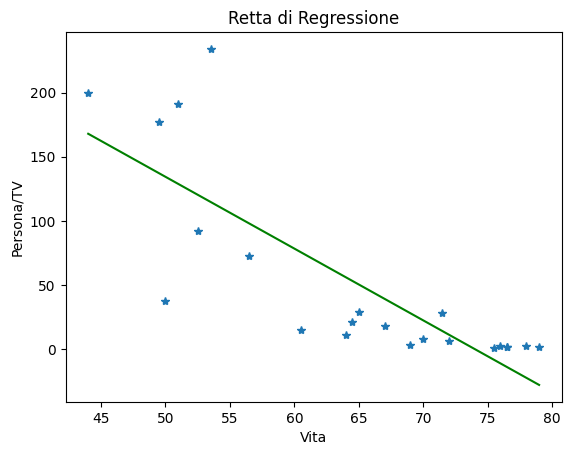

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([44, 76.5, 49.5, 76.5, 70, 60.5, 78, 79, 76, 53.5, 67, 52.5, 64.5, 72, 56.5, 69, 71.5, 64, 51, 75.5, 65, 50])
Y = np.array([200, 2, 177, 1.7, 8, 15, 2.6, 1.8, 3, 234, 18, 92, 21, 6.6, 73, 3.2, 28, 11, 191, 1.3, 29, 38])
n = 22

# Coefficienti della retta di regressione

x_bar = np.mean(X)
y_bar = np.mean(Y)

sig_bar_xy = np.sum((X - x_bar) * (Y - y_bar)) / n
sig_bar_x2 = np.sum((X - x_bar) ** 2) / n

b0 = y_bar - sig_bar_xy / sig_bar_x2 * x_bar
b1 = sig_bar_xy / sig_bar_x2

# Coefficente di determinazione

sig_y_2 = np.sum((Y - y_bar) ** 2) / n
R2 = sig_bar_xy**2 / (sig_bar_x2 * sig_y_2)
print("Coefficiente di determinazione: ", R2)

# Rappresentazione dei dati

min = np.round(np.min(X))
max = np.round(np.max(X))
assex = np.linspace(min, max, 1000)
assey = b0 + b1 * assex
plt.plot(X, Y, "*")
plt.plot(assex, assey, color="green")
plt.title("Retta di Regressione")
plt.xlabel("Vita")
plt.ylabel("Persona/TV")
plt.show()

# Esercizio 3

La precisione di una macchina che produce componenti di dimensioni specificate 
viene tenuta sotto controllo con verifiche campionarie: la dimensione specificata è 
mu = 3.5mm.  Se,  su  150  pezzi  prodotti,  si  è  riscontrata  una  media  campionaria pari  a   3.42mm e  una  varianza  campionaria  pari  a 0.2209 $mm^2$,  il  processo  va  considerato "sotto controllo" o "fuori controllo"? 

Rispondere poi alla stessa domanda, supponendo che le stesse statistiche siano state rilevate su un campione di ampiezza 60.

In [ ]:
from scipy.stats import norm

mu = 3.5  
x_bar = 3.42 
sigma_2 = 0.2209  
sigma = np.sqrt(sigma_2)  
alpha = 0.05  
n = 150

Z0 = np.abs(((x_bar - mu) / sigma) * np.sqrt(n))
t = norm.ppf(1-alpha/2)

print("Risutati con n = 150: ")
print("|Z0|: ", Z0, "t: ", t)

if (Z0 > t): 
    print("Si può rigettare l'ipotesi nulla")
else:
    print("Non è possibile rigettare l'ipotesi nulla")

n = 60

Z0 = np.abs(((x_bar - mu) / sigma) * np.sqrt(n))

print("Risutati con n = 60: ")
print("|Z0|: ", Z0, "t: ", t)

if (Z0 > t): 
    print("Si può rigettare l'ipotesi nulla")
else:
    print("Non è possibile rigettare l'ipotesi nulla")


Risutati con n = 150: 
|Z0|:  2.0846721215176 t:  1.959963984540054
Si può rigettare l'ipotesi nulla
Risutati con n = 60: 
|Z0|:  1.3184624157301856 t:  1.959963984540054
Non è possibile rigettare l'ipotesi nulla
